## Machine Learning

K-Nearest Neighbors

In [4]:
import pandas as pd
iris_df = pd.read_csv("iris1.csv")
print(iris_df.head(3))

   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


In [5]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter('ignore')

iris_df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


iris_df['variety'].unique()

In [6]:
iris_df['variety'].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

In [7]:
iris_df.isna().sum() # .isna() to detect missing values

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [8]:
# define features
Features = ['sepal.length','sepal.width','petal.length','petal.width']

In [9]:
# Visualize
fig = px.scatter(iris_df, x='petal.width', y='petal.length',
                 color='variety',symbol='variety')
fig.show()

In [10]:
fig=px.scatter_matrix(iris_df, dimensions=['sepal.width',
                                           'sepal.length','petal.width',
                                           'petal.length'],color='variety')
fig.show()

#### Training and Test Data
split to x_train(or X_train), x_test(or X_test),y_train,y_test, which are all numpy arrays.
x_train contains 75% of the dataset, x_test contains the remaining 25%.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[Features],iris_df['variety'],random_state=0)

#### KNN

KNN is a supervised learning classifier , which uses proximity (接近距離) to make 
classification or predictions about the grouping of an individual data point.
It stores all the variable cases and classifies the new data or case based on
a similarity measure.
If the input data has more outliers or noise, a higher value of k would be better .
K defines how many neighbors will be checked.
For each data point in the data.

    . Find the Euclidean distance to all training data samples
    . Store the distances on an ordered list and sort it.
    . Choose the top K entries from the sorted list
    . Label the test point based on the majority of classes present in the selected points

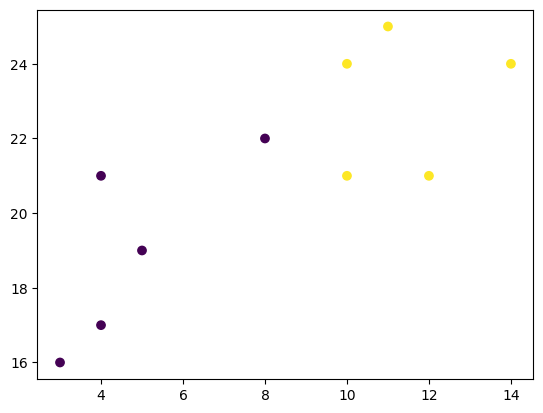

In [12]:
# Examples of KNN
# 1
import matplotlib.pyplot as plt
x = [4,5,10,4,3,11,14,8,10,12]
y = [21,19,24,17,16,25,24,22,21,21]
classes = [0,0,1,0,0,1,1,0,1,1]
plt.scatter(x,y,c=classes)
plt.show()

In [13]:
# Example of KNN - KNN Classifier
# 2
from sklearn.neighbors import KNeighborsClassifier
data = list(zip(x,y))
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data,classes) # train the model

KNeighborsClassifier(n_neighbors=1)

Text(6.3, 20.3, 'new point, class:0')

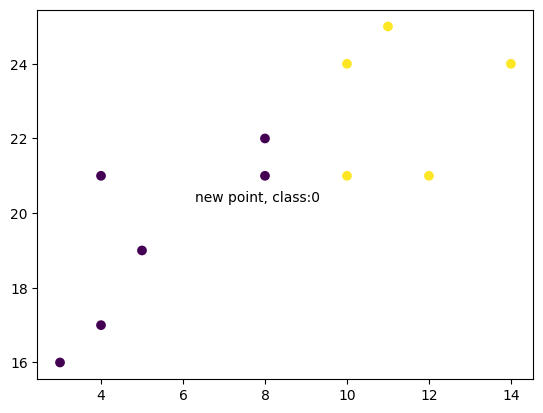

In [14]:
# Example of KNN - new data prediction
# # 3
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
plt.scatter(x + [new_x], y + [new_y], c = classes + [prediction[0]] )
plt.text(x = new_x - 1.7, y = new_y - 0.7,
         s = f"new point, class:{prediction[0]}")

In [15]:
# Cont. the flower KNN's case
# Train the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [16]:
# Accuracy score (correlation ie between 0 to 1)
knn.score(X_test, y_test)

0.9736842105263158

### Make prediction (Classify an unknown species)

In [17]:
X_new = pd.DataFrame(np.array([[5,2.9,1,0.2]]), columns = Features)
X_new

,sepal.length,sepal.width,petal.length,petal.width
0,5.0,2.9,1.0,0.2


In [18]:
print('This is a', knn.predict(X_new)[0])
#print('Hi', knn.probability)

This is a Setosa


In [2]:
import numpy
from sklearn import linear_model
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print(predicted)

[0]


In [ ]:
# The coefficient is the expected change in log=odds of having
# the outcome per unit change to X
# Let odds is the ratio of something occurring to something not occuring
# Log-odds, the dependent variable are modeled as a linear combination
# of the independent variables and the intercept
log_odds=logr.coef_
odds=numpy.exp(log_odds)
print(odds)
# output os 4. it means the size of a tumor increases by 1
# the odds of it being a cancerous tumor increase by 4x

In [1]:
import numpy
from sklearn import linear_model

X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

def logit2prob(logr, X):
  log_odds = logr.coef_ * X + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(logr, X))
# to find out the probability that each tumor is cancerous

[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [ ]:
# The coefficient and intercept values can be used to find
# the probability that each tumor is cancerous

# Create a function to return probability that the given observation
# is a tumor
def logit2prob(logr,xx):
    log_odds=logr.coef_ * xx + logr.intercept_
# convert the log-odds  to odds requires exponentiate the log-odd
    odds=numpy.exp(log_odds)
    probability=odds/(1+odds)
    return(probability)
print(logit2prob(logr,X))
# X=numpy.array(3.78,2.44,2.09)
# meaning:
# 3.78,0.607: Probability tumor size of 3.78 is cancerous is 61%
# 2.44,0.19: Probability tumor size of 2.44 is cancerous is 19%

need modify  return(probability) to  return(probability*100)